# __Tarea 2:__ 

1. Nombre: Juan Luis   
1. Apellido: Fernández Abreu
1. Correo: juuanfz@gmail.com
--------

# PARTE I

## 10_1_1D_Convolution

En esencia, una convolución 1D consiste en aplicar una ventana deslizante (kernel o filtro) sobre una secuencia de datos, multiplicando y sumando valores locales para extraer patrones locales.

En este notebook, implementé  manualmente dos funciones:
- Una convolución con stride=1.
- Una convolución con stride=2.

Esta implementación me obliga a entender la mecánica exacta de la operación, evitando el uso de librerías automáticas.

### Función 1: `conv_3_1_1_zp`


In [1]:
# Now let's define a zero-padded convolution operation
# with a convolution kernel size of 3, a stride of 1, and a dilation of 1
# as in figure 10.2a-c.  Write it yourself, don't call a library routine!
# Don't forget that Python arrays are indexed from zero, not from 1 as in the book figures

def conv_3_1_1_zp(x_in, omega):
    x_out = np.zeros_like(x_in)
    # TODO -- write this function
    # replace this line
    x_in = np.array(x_in)
    omega = np.array(omega)
    pad = 1  # Porque el kernel es de tamaño 3 → (kernel_size - 1)//2
    # Aplicar zero-padding
    x_padded = np.pad(x_in, pad_width=pad, mode='constant', constant_values=0)

    for i in range(len(x_out)):
        window = x_padded[i : i + 3]  # Tamaño del kernel = 3
        x_out[i] = np.sum(window * omega)

    return x_out

Aquí vemos una convolución básica:
- Kernel de tamaño 3.
- Stride de 1.
- Zero-padding aplicado para conservar el tamaño.

Este paso me hizo reflexionar sobre el rol del padding: sin él, la señal se va haciendo más pequeña a medida que se aplican convoluciones, lo cual puede no ser deseable en las primeras capas.

### Función 2: `conv_3_2_1_zp`

In [2]:
# Now let's define a zero-padded convolution operation
# with a convolution kernel size of 3, a stride of 2, and a dilation of 1
# as in figure 10.3a-b.  Write it yourself, don't call a library routine!
def conv_3_2_1_zp(x_in, omega):
    x_out = np.zeros(int(np.ceil(len(x_in)/2)))
    # TODO -- write this function
    # replace this line
    x_in = np.array(x_in)
    omega = np.array(omega)
    pad = 1  # Zero-padding, igual que antes

    x_padded = np.pad(x_in, pad_width=pad, mode='constant', constant_values=0)
    x_out = np.zeros(int(np.ceil(len(x_in) / 2)))
    
    idx = 0
    for i in range(0, len(x_in), 2):  # Avanza de 2 en 2 (stride=2)
        window = x_padded[i : i + 3]
        x_out[idx] = np.sum(window * omega)
        idx += 1
    return x_out

La segunda función introduce stride=2, lo cual hace que:
- La salida sea más corta (reducción dimensional).
- El procesamiento sea más eficiente.
- Peligro: puedo perder información fina.

Esto me recordó que el stride también actúa como una forma de "downsampling".

### Función 3: `conv_5_1_1_zp`

In [3]:
# Now let's define a zero-padded convolution operation
# with a convolution kernel size of 5, a stride of 1, and a dilation of 1
# as in figure 10.3c.  Write it yourself, don't call a library routine!
def conv_5_1_1_zp(x_in, omega):
    x_out = np.zeros_like(x_in)
    # TODO -- write this function
    # replace this line
    x_in = np.array(x_in)
    omega = np.array(omega)
    pad = 2  # (5 - 1) // 2 = 2 → Padding para kernel size 5

# Aplicar zero-padding
    x_padded = np.pad(x_in, pad_width=pad, mode='constant', constant_values=0)

    for i in range(len(x_out)):
        window = x_padded[i : i + 5]  # Tamaño del kernel = 5
        x_out[i] = np.sum(window * omega)
    return x_out

Este paso me hace reflexionar sobre el efecto del **tamaño del kernel**:
- Un kernel más grande captura patrones más amplios en la señal.
- El filtro se vuelve menos "local" y más "global" en comparación con un manejado antes de kernel de tamaño 3.
- Al mantener el **stride en 1**, aseguro que ninguna posición de la señal original sea ignorada.


### Función 4: `conv_3_1_2_zp`

In [4]:
# Finally let's define a zero-padded convolution operation
# with a convolution kernel size of 3, a stride of 1, and a dilation of 2
# as in figure 10.3d.  Write it yourself, don't call a library routine!
# Don't forget that Python arrays are indexed from zero, not from 1 as in the book figures
def conv_3_1_2_zp(x_in, omega):
    x_out = np.zeros_like(x_in)
    # TODO -- write this function
    # replace this line
    x_in = np.array(x_in)
    omega = np.array(omega)
    dilation = 2
    kernel_size = 3
    # El tamaño efectivo del kernel (receptive field) aumenta:
    receptive_field = (kernel_size - 1) * dilation + 1
    pad = (receptive_field - 1) // 2  # Para mantener el tamaño con padding

    x_padded = np.pad(x_in, pad_width=pad, mode='constant', constant_values=0)

# Convolución con dilatación
    for i in range(len(x_out)):
        # Seleccionar elementos con espacio (dilation = 2) entre ellos
        window = x_padded[i : i + receptive_field : dilation]
        x_out[i] = np.sum(window * omega)

    return x_out

Este paso me hizo entender el propósito práctico del **dilation**:
- Permite al kernel observar un "receptivo field" más amplio sin aumentar el tamaño del kernel.
- Funciona como si se insertaran huecos dentro del kernel.
- Con **stride=1**, sigo procesando toda la señal sin saltos.

### Función 5: `get_conv_mat_3_1_1_zp`

In [5]:
# Compute matrix in figure 10.4 d
def get_conv_mat_3_1_1_zp(n_out, omega):
  omega_mat = np.zeros((n_out,n_out))
  # TODO Fill in this matrix
  # Replace this line:
  
  pad = 1  # Padding aplicado al principio y al final

  for row in range(n_out):
      for k in range(3):  # kernel size = 3
          col = row + k - pad
          if 0 <= col < n_out:
             omega_mat[row, col] = omega[k]

  return omega_mat

Esta función me ayudó a visualizar que una convolución, en el fondo, es una operación **lineal**: se puede expresar como un producto entre una matriz (que desplaza y coloca el kernel en diferentes posiciones) y el vector de entrada.

Traducir una convolución a una operación matricial me mostró que el aprendizaje profundo está lleno de operaciones lineales ocultas bajo procesos "aparentemente mágicos"

La Matriz que genera es algo como esto:
```
[[w1, w2,  0,  0,  0],
 [w0, w1, w2,  0,  0],
 [ 0, w0, w1, w2,  0],
 [ 0,  0, w0, w1, w2],
 [ 0,  0,  0, w0, w1]]
```

TODO:  What do you expect to happen if we apply the last convolution twice?  Can this be represented as a single convolution?  If so, then what is it?

Aplicar dos veces la misma convolución (convolution over convolution) expande el *'receptive field'* de la operación.

 ¿Puede representarse como una única convolución?

**Sí.**
- Aplicar la misma convolución dos veces equivale a aplicar una sola convolución con un **kernel compuesto**.
- Este kernel compuesto se obtiene al convolucionar el **kernel original consigo mismo**.


En conclusión, aplicar dos veces la misma convolución es igual a aplicar una convolución con un kernel más grande.

## 10_2_Convolution_for_MNIST_1D

In [6]:
# There are 40 input dimensions and 10 output dimensions for this data
# The inputs correspond to the 40 offsets in the MNIST1D template.
D_i = 40
# The outputs correspond to the 10 digits
D_o = 10


# TODO Create a model with the following layers
# 1. Convolutional layer, (input=length 40 and 1 channel, kernel size 3, stride 2, padding="valid", 15 output channels )
# 2. ReLU
# 3. Convolutional layer, (input=length 19 and 15 channels, kernel size 3, stride 2, padding="valid", 15 output channels )
# 4. ReLU
# 5. Convolutional layer, (input=length 9 and 15 channels, kernel size 3, stride 2, padding="valid", 15 output channels)
# 6. ReLU
# 7. Flatten (converts 4x15) to length 60
# 8. Linear layer (input size = 60, output size = 10)
# References:
# https://pytorch.org/docs/1.13/generated/torch.nn.Conv1d.html?highlight=conv1d#torch.nn.Conv1d
# https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html
# https://pytorch.org/docs/1.13/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear

# NOTE THAT THE CONVOLUTIONAL LAYERS NEED TO TAKE THE NUMBER OF INPUT CHANNELS AS A PARAMETER
# AND NOT THE INPUT SIZE.

# Replace the following function:
model = nn.Sequential(
    nn.Conv1d(in_channels=1, out_channels=15, kernel_size=3, stride=2, padding=0),  # Capa 1
    nn.ReLU(),
    nn.Conv1d(in_channels=15, out_channels=15, kernel_size=3, stride=2, padding=0), # Capa 2
    nn.ReLU(),
    nn.Conv1d(in_channels=15, out_channels=15, kernel_size=3, stride=2, padding=0), # Capa 3
    nn.ReLU(),
    nn.Flatten(),                         # Convierte 4x15 = 60 a vector plano
    nn.Linear(60, 10)                     # Capa lineal final para clasificación
)


NameError: name 'nn' is not defined

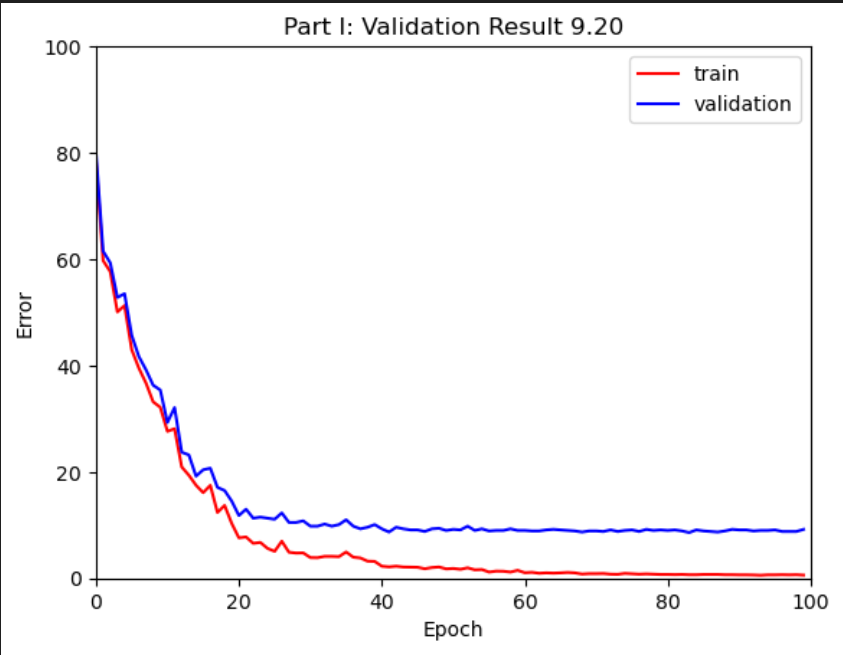

- Al inicio, el error tanto en entrenamiento como en validación es muy alto (casi 80%).

- Las curvas de error caen rápidamente en las primeras 20-30 épocas: Por ende se envidencia que el modelo aprende rápido las características principales.

## 10_3_2D_Convolution

- Implementar la convolución manualmente me ayudó a entender cómo funciona realmente el desplazamiento del kernel y el rol del padding y stride.

- Ver cómo cada píxel es procesado y cómo los canales se combinan para formar nuevas representaciones permite apreciar lo que normalmente PyTorch o TensorFlow ocultan.

- Codear 'desde 0' ayuda a detectar dónde y por qué podría romperse un modelo si las dimensiones no se gestionan bien.

- En DL, entender el paso a paso matemático detrás de las operaciones hace la diferencia entre usar modelos y realmente saber cómo funcionan.

## 10_4_Downsampling_and_Upsampling

- Cada función, desde el *submuestreo* hasta el *max pooling* y la *interpolación bilineal*, tieinen detrás operaciones simples como: sumas, promedios, máximos o duplicación de valores. Implementarlas nos da a pensar en cómo se procesan los píxeles y qué significa realmente "reducir" o "ampliar" una imagen.

Lo más importante: los detalles como el padding o el redondeo afectan directamente la reconstrucción y el resultado visual. Esto al momento de tomar decisiones técnicas definen qué aprenderá el modelo.


## 10_5_Convolution_For_MNIST

- Implementar las capas de la CNN me ayudó a entender el "por qué" detrás de cada paso, no solo el "cómo".
- Ver cómo cambia el tamaño del tensor después de cada operación me permitió visualizar el flujo interno del modelo.
- Corregir problemas como el uso incorrecto del *Softmax* y cambiarlo a *LogSoftmax*, con *Softmax* me daba valores negativos, en las probabilidades y a que se estaban tomando los valores de probabilidades crudos, al cambiar con *LogSoftmax* vemos que se le aplica la función logaritmo haciéndolos <=0, esto es importante cuando la función de pérdida es NLLLoss (Negative Log Likelihood), ya que esta espera log-probabilidades como entrada, y lo vemos luego en el notebook que está definida de esa forma.
- Comprendí que el aprendizaje profundo es un sistema jerárquico donde cada capa extrae conocimiento progresivamente más complejo.
